In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd

/home/lme/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# RMSD cMD

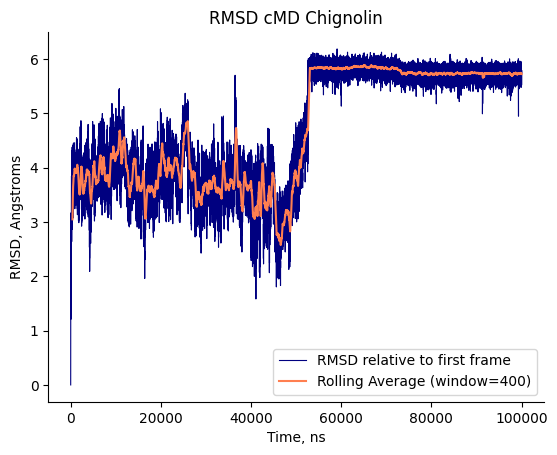

In [39]:
rmsd_data = pd.read_csv("prot-rmsd-ca.dat",skiprows=1, names = ["Frame","RMSD"],sep="\s+")
xray_rmsd_data = pd.read_csv("rmsd-xray-ca.dat",skiprows=1, names = ["Frame","RMSD"],sep="\s+")
# Calculate a rolling average with a window size of your choice, e.g., 10 frames
rolling_window = 400
rmsd_rolling_avg = rmsd_data.loc[:, "RMSD"].rolling(window=rolling_window).mean()
rmsd_xray_rolling_avg = xray_rmsd_data.loc[:, "RMSD"].rolling(window=rolling_window).mean()


# Plot original RMSD data
plt.plot(rmsd_data.loc[:, "Frame"], rmsd_data.loc[:, "RMSD"], label='RMSD relative to first frame', linewidth=0.8, color='navy')
#plt.plot(xray_rmsd_data.loc[:, "Frame"], xray_rmsd_data.loc[:, "RMSD"], label='RMSD relative XRay Structure', linewidth=0.8, color='dodgerblue')

# Plot rolling average
plt.plot(rmsd_data.loc[:, "Frame"], rmsd_rolling_avg, label=f'Rolling Average (window={rolling_window})', linewidth=1.5, color='coral')
#plt.plot(xray_rmsd_data.loc[:, "Frame"], rmsd_xray_rolling_avg, label=f'Rolling Average (window={rolling_window})', linewidth=1.5, color='gold')


# Add labels and legend
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc='best')
plt.xlabel('Time, ns')
plt.title("RMSD cMD Chignolin")
plt.ylabel('RMSD, Angstroms')

# Show the plot
plt.show()


# RMSD aMD